# General aim of the notebook

This notebook aims at optimizing the parameters of the different machine learning methods tested for the classification of the emotions.
The models optimized here are the following : **Random Forest Classifier, Decision Tree Classifier, SVM, kNN**

Note that the two NN are optimized in separated notebooks.

# How to use this notebook
1. Change the datapath and load the data

2. Run the preprocessing

3. Run the optimization cells of the model to optimize

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from tqdm.notebook import tqdm_notebook

In [8]:
def cm_to_inch(value):
    return value/2.54

## Load the data

In [2]:
#--------data paths------------------------------------------------------------------------------------------
data_train_path = 'C:/Users/manon/Desktop/Projet_2 _ML/code/datas/Split_48_neutre/Combined_All_Train_80.csv'
data_test_path = 'C:/Users/manon/Desktop/Projet_2 _ML/code/datas/Split_48_neutre/Combined_All_Test_80.csv'

#--------loading the data and spliting between features and predictions--------------------------------------
tx_train = pd.read_csv(data_train_path,sep=",",squeeze=True)
X_train=tx_train.iloc[:, :48]
ytr = pd.read_csv(data_train_path,sep=",",usecols=[48],squeeze=True)

tx_test = pd.read_csv(data_test_path,sep=",",squeeze=True)
X_test=tx_test.iloc[:, :48]
yte = pd.read_csv(data_test_path,sep=",",usecols=[48],squeeze=True)

#---------Adding features name (i.e. number of the brain region represented by the feature)------------------
def add_column_names(data):
    
    liste=[]
    for i in range(48):
        liste.append(str(i+1))
    data.columns=liste
    return data,liste

X_train,liste = add_column_names(X_train)
X_test,liste = add_column_names(X_test)

#---------Convert y to int to be compatible with future prediction--------------------------------------------
ytr = ytr.astype(np.int64)
yte = yte.astype(np.int64)

## Preprocessing
###  1. Data standardization

In [3]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Optimization
### 1. Random Forest

In [4]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto',  'log2'],
    'max_depth' : [3,5,7,9],
    'criterion' :['gini', 'entropy']
}


CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, ytr)

print("Best hyperparameters --> \n", CV_rfc.best_params_)

KeyboardInterrupt: 

### 2. Decision Tree Classifier

In [6]:
from sklearn.tree import DecisionTreeClassifier
error_rate=[]
for i in tqdm_notebook(range(1,50)):
    dtree_model = DecisionTreeClassifier(max_depth=i, criterion='gini')
    model = dtree_model.fit(X_train,ytr)
    pred_i = dtree_model.predict(X_test)
    error_rate.append(np.mean(pred_i != yte))

  0%|          | 0/49 [00:00<?, ?it/s]

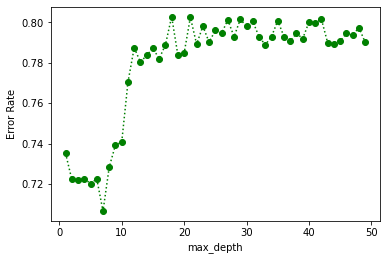

In [9]:
plt.figure(figsize=(cm_to_inch(15),cm_to_inch(10)))
plt.plot(range(1,50), error_rate, linestyle = 'dotted', marker = 'o',color = 'g')
plt.xlabel('max_depth')
plt.ylabel('Error Rate')
plt.show() 

### 3. SVM

In [11]:
from sklearn.svm import SVC
Cs = np.linspace(0.01,0.5,50)
error_rate=[]
for c in tqdm_notebook(Cs):
    svm = SVC(kernel = 'sigmoid', C = c)
    model = svm.fit(X_train,ytr)
    pred_i = svm.predict(X_test)
    error_rate.append(np.mean(pred_i != yte))


  0%|          | 0/50 [00:00<?, ?it/s]

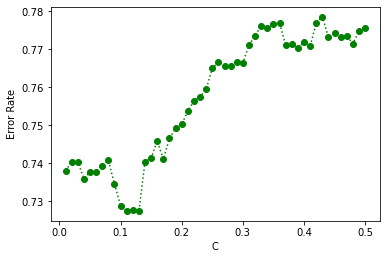

In [12]:
plt.figure(figsize=(cm_to_inch(15),cm_to_inch(10)))
plt.plot(Cs, error_rate, linestyle = 'dotted', marker = 'o',color = 'g')
plt.xlabel('C')
plt.ylabel('Error Rate')
plt.show() 

### 4. kNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
error_rate=[]
for i in tqdm_notebook(range(1,1000)):
    knn = KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(X_train,ytr)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != yte))
 

  0%|          | 0/999 [00:00<?, ?it/s]

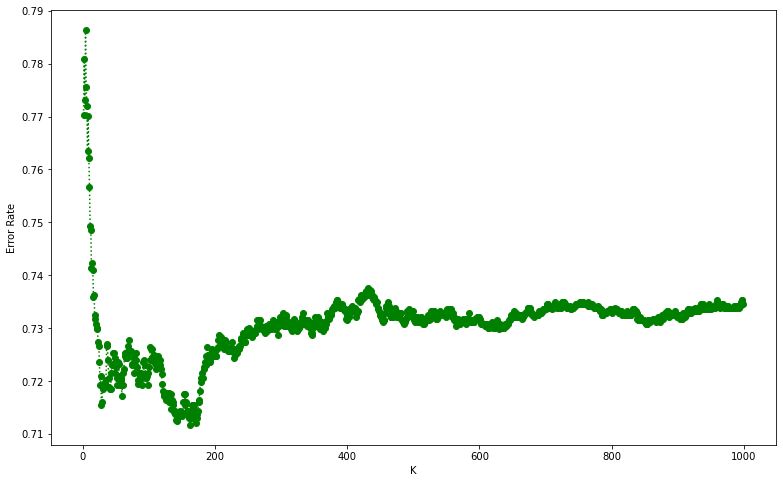

In [18]:
plt.figure(figsize=(13,8))
plt.plot(range(1,1000), error_rate, linestyle = 'dotted', marker = 'o',color = 'g')
plt.xlabel('K')
plt.ylabel('Error Rate')
#plt.title('K value Vs Error Rate')
plt.show() 

In [19]:
print(np.argmin(error_rate))

161
